In [ ]:
pip install mlrose-hiive

     |████████████████████████████████| 49 kB 3.9 MB/s 
  Created wheel for mlrose-hiive: filename=mlrose_hiive-2.2.4-py3-none-any.whl size=98351 sha256=d1af8f5c5cf4f835cf2cd82ddbb4f1049f04af110ff7c12d361a4e7c17e64dae
  Stored in directory: /root/.cache/pip/wheels/ca/9c/44/36113054dda94da67040173c2a475dbfb6980c2c6ddf5747b1
Successfully built mlrose-hiive


In [ ]:
from IPython.core.display import display, HTML # for some notebook formatting.

import mlrose_hiive
import numpy as np
import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval
import chess

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator
from mlrose_hiive import SARunner, GARunner, NNGSRunner, RHCRunner, MIMICRunner

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

In [ ]:
def eval_score (num_eval, f_score, method):
  plt.figure(figsize=(14,10))
  plt.grid()
  plt.plot(num_eval, f_score)
  plt.title(f'Fitness Score - Number of Evaluation on {method}', fontsize =18)
  plt.xlabel('# Fitness Function Evaluation', fontsize =18)
  plt.ylabel('Fitness Score', fontsize =18)
  plt.show()

In [ ]:
def eval_time (num_eval, time, method):
  plt.figure(figsize=(14,10))
  plt.grid()
  plt.plot(num_eval, time)
  plt.title(f'Running Time/Number of Evaluation on {method}', fontsize =18)
  plt.xlabel('# Fitness Function Evaluation', fontsize =18)
  plt.ylabel('Running Time', fontsize =18)
  plt.show()

In [ ]:
def iter_score (num_iter, fit, method):
  plt.figure(figsize=(14,10))
  plt.grid()
  plt.plot(num_iter, fit)
  plt.title(f'Fitness Score - Number of Iteration on {method}', fontsize = 18)
  plt.xlabel('# Iteration', fontsize = 18)
  plt.ylabel('Fitness Score', fontsize = 18)
  plt.show()

In [ ]:
def iter_compare (num_iter, fit_1, fit_2, label_1, label_2, xlabel, ylabel, title):
  plt.figure(figsize=(14,10))
  plt.grid()
  plt.title(f'{title} Comparison on Best Runner', fontsize = 18)
  plt.plot(num_iter, fit_1, label= label_1, color='r')
  plt.plot(num_iter, fit_2, label= label_2, color='b')
  plt.xlabel(xlabel, fontsize = 18)
  plt.ylabel(ylabel, fontsize = 18)
  plt.legend(loc='best')

In [ ]:
def iter_final_compare (num_iter, fit_1, fit_2, fit_3, fit_4, label_1, label_2, label_3, label_4, xlabel, ylabel, title):
  plt.figure(figsize=(14,10))
  plt.grid()
  plt.title(f'{title} Best Runners Comparison', fontsize = 18)
  plt.plot(num_iter, fit_1, label= label_1, color='r')
  plt.plot(num_iter, fit_2, label= label_2, color='b')
  plt.plot(num_iter, fit_3, label= label_3, color='g')
  plt.plot(num_iter, fit_4, label= label_4, color='black')
  plt.xlabel(xlabel, fontsize = 18)
  plt.ylabel(ylabel, fontsize = 18)
  plt.legend(loc='best')

In [ ]:
dir(mlrose_hiive)

['ArithDecay',
 'ChangeOneMutator',
 'ContinuousOpt',
 'ContinuousPeaks',
 'ContinuousPeaksGenerator',
 'CustomFitness',
 'CustomSchedule',
 'DiscreteMutator',
 'DiscreteOpt',
 'ExpDecay',
 'FlipFlop',
 'FlipFlopGenerator',
 'FlipFlopOpt',
 'FourPeaks',
 'GARunner',
 'GeomDecay',
 'GridSearchMixin',
 'Knapsack',
 'KnapsackGenerator',
 'KnapsackOpt',
 'LinearRegression',
 'LogisticRegression',
 'MIMICRunner',
 'MaxKColor',
 'MaxKColorGenerator',
 'MaxKColorOpt',
 'NNClassifier',
 'NNGSRunner',
 'NetworkWeights',
 'NeuralNetwork',
 'OneMax',
 'OnePointCrossOver',
 'Queens',
 'QueensGenerator',
 'QueensOpt',
 'RHCRunner',
 'SARunner',
 'ShiftOneMutator',
 'SixPeaks',
 'SwapMutator',
 'TSPCrossOver',
 'TSPGenerator',
 'TSPOpt',
 'TravellingSales',
 'UniformCrossOver',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_nn_core',
 'algorithms',
 'build_data_filename',
 'decorators',
 'fitness',
 'flatten_weights',

In [ ]:
#Checking the Source of functions
import inspect

print(inspect.getsource(mlrose_hiive.FlipFlopOpt))

class FlipFlopOpt(DiscreteOpt):
    def __init__(self, length=None, fitness_fn=None, maximize=True,
                 crossover=None, mutator=None):

        if (fitness_fn is None) and (length is None):
            raise Exception("fitness_fn or length must be specified.")

        if length is None:
            length = len(fitness_fn.weights)

        self.length = length

        if fitness_fn is None:
            fitness_fn = FlipFlop()

        self.max_val = 2
        crossover = OnePointCrossOver(self) if crossover is None else crossover
        mutator = ChangeOneMutator(self) if mutator is None else mutator
        super().__init__(length, fitness_fn, maximize, 2, crossover, mutator)

        state = np.random.randint(2, size=self.length)
        self.set_state(state)

    def evaluate_population_fitness(self):
        # Calculate fitness
        pop_fitness = self.fitness_fn.evaluate_many(self.population)
        self.pop_fitness = pop_fitness

    def random_pop(self, pop_si

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
% cd "/content/drive/MyDrive/Georgia Tech/Machine Learning-CS7641/Assignments/Assignment #2"

/content/drive/MyDrive/Georgia Tech/Machine Learning-CS7641/Assignments/Assignment #2


In [ ]:
! git clone https://github.com/hiive/mlrose.git

Cloning into 'mlrose'...
remote: Enumerating objects: 2525, done.
remote: Counting objects: 100% (315/315), done.
remote: Compressing objects: 100% (227/227), done.
remote: Total 2525 (delta 202), reused 171 (delta 88), pack-reused 2210
Receiving objects: 100% (2525/2525), 1.91 MiB | 3.71 MiB/s, done.
Resolving deltas: 100% (1778/1778), done.
Checking out files: 100% (124/124), done.


In [ ]:
% cd "mlrose/mlrose_hiive"

/content/drive/MyDrive/Georgia Tech/Machine Learning-CS7641/Assignments/Assignment #2/mlrose/mlrose_hiive


In [ ]:
from generators.knapsack_generator import KnapsackGenerator

In [ ]:
problem = KnapsackGenerator.generate(seed = 0, number_of_items_types= 8,
                                  max_item_count=10, max_weight_per_item= 12,
                                  max_value_per_item= 5, max_weight_pct=0.7,
                                  multiply_by_max_item_count= True)

In [ ]:
rhc = RHCRunner(problem, experiment_name= 'knapsack_rhc', seed= 0,
                iteration_list= 2 ** np.arange(11),
                restart_list = [10], generate_curves= True)

In [ ]:
# the two data frames will contain the results
df_rhc_stats, df_rhc_curves = rhc.run()

In [ ]:
best_fitness_rhc = df_rhc_curves['Fitness'].max()

best_runs_rhc = df_rhc_curves[df_rhc_curves['Fitness'] == best_fitness_rhc]

best_runs_rhc

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
3484,56,0.034586,178.0,3543.0,10,1024,6
3485,57,0.034666,178.0,3544.0,10,1024,6
3486,58,0.034779,178.0,3545.0,10,1024,6
3487,59,0.034886,178.0,3546.0,10,1024,6
3488,60,0.034972,178.0,3547.0,10,1024,6
...,...,...,...,...,...,...,...
3980,552,0.190294,178.0,4039.0,10,1024,6
3981,553,0.190634,178.0,4040.0,10,1024,6
3982,554,0.194266,178.0,4041.0,10,1024,6
3983,555,0.194659,178.0,4042.0,10,1024,6


In [ ]:
# Best Params

restart = 10
current_restart = 6

best_params_run_rhc = df_rhc_stats[(df_rhc_stats['Restarts'] == restart) &
                                   (df_rhc_stats['current_restart'] == current_restart)]
best_params_run_rhc

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
72,0,106.0,3475,4.075809,"[4, 4, 1, 1, 8, 8, 3, 2]",10,1024,6
73,1,108.0,3477,4.087575,"[4, 4, 1, 1, 8, 8, 4, 2]",10,1024,6
74,2,108.0,3478,4.100278,"[4, 4, 1, 1, 8, 8, 4, 2]",10,1024,6
75,4,120.0,3482,4.117519,"[8, 4, 1, 1, 8, 8, 4, 2]",10,1024,6
76,8,124.0,3488,4.135391,"[8, 4, 2, 1, 8, 9, 4, 2]",10,1024,6
77,16,141.0,3498,4.161447,"[8, 4, 9, 1, 8, 9, 9, 2]",10,1024,6
78,32,158.0,3517,4.202668,"[8, 6, 9, 1, 8, 9, 9, 9]",10,1024,6
79,64,178.0,3551,4.285503,"[8, 9, 9, 1, 9, 9, 9, 9]",10,1024,6
80,128,178.0,3615,4.421210,"[8, 9, 9, 1, 9, 9, 9, 9]",10,1024,6
81,256,178.0,3743,4.693243,"[8, 9, 9, 1, 9, 9, 9, 9]",10,1024,6


In [ ]:
# Picking the less time consuming among best runners
optim_rhc = best_params_run_rhc[(best_params_run_rhc['Iteration'] == 64) &
                                (best_params_run_rhc['Fitness'] == best_fitness_rhc)]
optim_rhc

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
79,64,178.0,3551,4.285503,"[8, 9, 9, 1, 9, 9, 9, 9]",10,1024,6


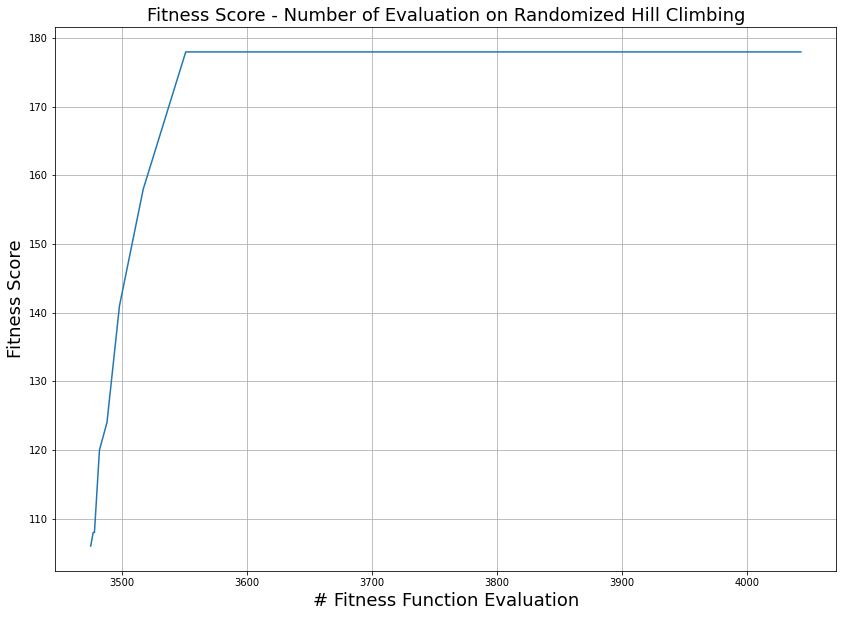

In [ ]:
 eval_score(best_params_run_rhc['FEvals'], best_params_run_rhc['Fitness'], 'Randomized Hill Climbing')

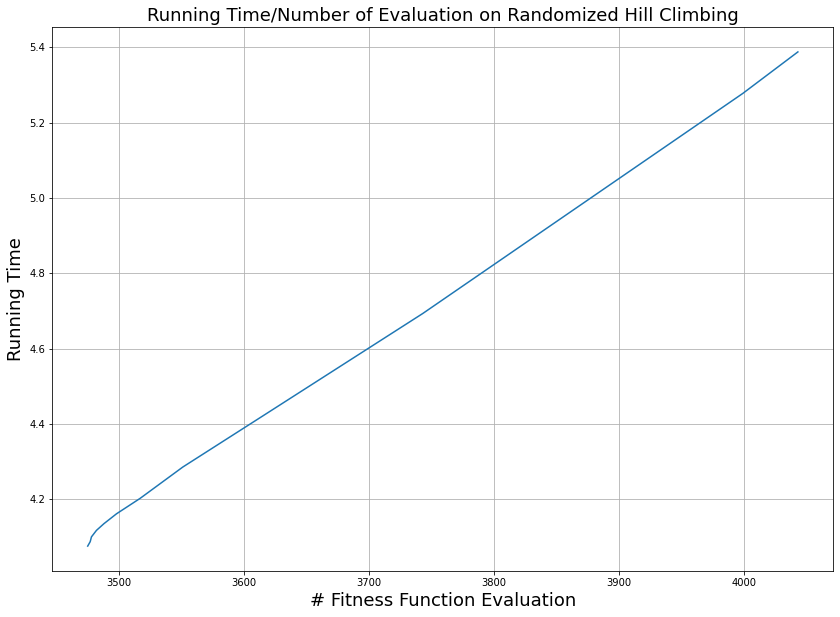

In [ ]:
eval_time(best_params_run_rhc['FEvals'], best_params_run_rhc['Time'], 'Randomized Hill Climbing')

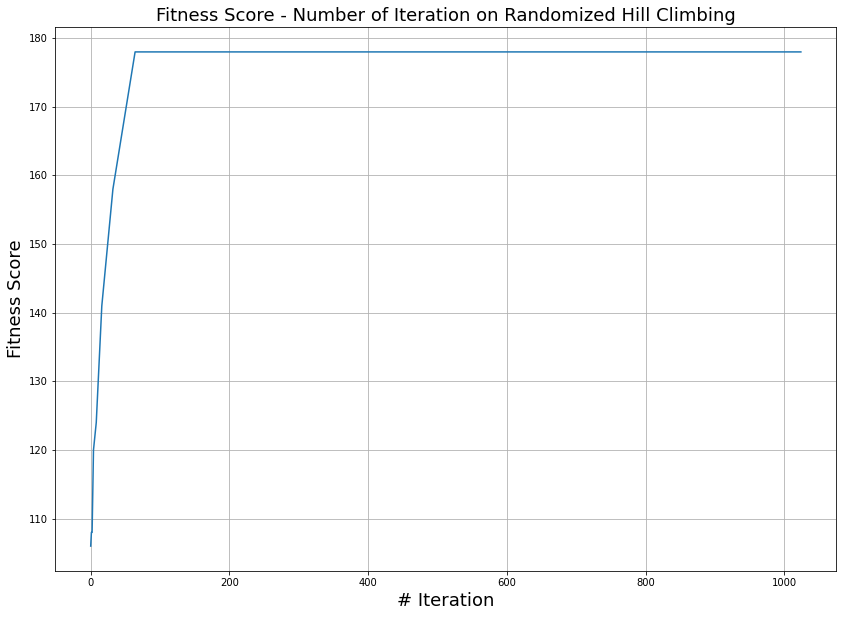

In [ ]:
iter_score(best_params_run_rhc['Iteration'], best_params_run_rhc['Fitness'], 'Randomized Hill Climbing')

Simulated Annealing

In [ ]:
sa = SARunner(problem, experiment_name='knapsack_sa', seed=0,
              iteration_list= 2 ** np.arange(11),
              temperature_list= [6, 7, 8, 9, 10],
              decay_list= [mlrose_hiive.GeomDecay, mlrose_hiive.ExpDecay],
              generate_curve = True)

In [ ]:
# the two data frames will contain the results
df_sa_stats, df_sa_curves = sa.run()

In [ ]:
best_fitness_sa = df_sa_curves['Fitness'].max()
best_runs_sa = df_sa_curves[df_sa_curves['Fitness'] == best_fitness_sa]
best_runs_sa

,Iteration,Time,Fitness,FEvals,Temperature,max_iters,generate_curve
332,332,0.089361,180.0,381.0,6,1024,True
333,333,0.089600,180.0,382.0,6,1024,True
334,334,0.089828,180.0,383.0,6,1024,True
335,335,0.090057,180.0,384.0,6,1024,True
336,336,0.090333,180.0,385.0,6,1024,True
...,...,...,...,...,...,...,...
8240,832,0.315513,180.0,911.0,10,1024,True
8241,833,0.000151,180.0,912.0,10,1024,True
8242,834,0.004894,180.0,913.0,10,1024,True
8243,835,0.008762,180.0,914.0,10,1024,True


In [ ]:
min_iteration = best_runs_sa['Iteration'].min()
optim_sa = best_runs_sa[best_runs_sa['Iteration'] == min_iteration]
optim_sa

,Iteration,Time,Fitness,FEvals,Temperature,max_iters,generate_curve
332,332,0.089361,180.0,381.0,6,1024,True


In [ ]:
best_params_run_sa = df_sa_stats[(df_sa_stats['Temperature'] == optim_sa['Temperature'].values[0])]

best_params_run_sa

,Iteration,Fitness,FEvals,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters,generate_curve,schedule_exp_const
0,0,111.0,0,0.000358,"[2, 4, 7, 6, 8, 8, 1, 6]",geometric,6,0.99,0.001,5.999978,6,1024,True,NaN
1,1,113.0,2,0.009106,"[2, 4, 7, 6, 8, 8, 1, 8]",geometric,6,0.99,0.001,5.999451,6,1024,True,NaN
2,2,129.0,4,0.013433,"[2, 4, 7, 6, 8, 8, 9, 8]",geometric,6,0.99,0.001,5.999190,6,1024,True,NaN
3,4,154.0,8,0.018386,"[2, 9, 7, 6, 8, 8, 9, 8]",geometric,6,0.99,0.001,5.998891,6,1024,True,NaN
4,8,150.0,14,0.021035,"[1, 9, 7, 5, 8, 8, 9, 8]",geometric,6,0.99,0.001,5.998732,6,1024,True,NaN
5,16,138.0,27,0.023978,"[2, 9, 0, 2, 7, 8, 9, 8]",geometric,6,0.99,0.001,5.998554,6,1024,True,NaN
6,32,162.0,49,0.027634,"[6, 9, 1, 3, 9, 8, 9, 8]",geometric,6,0.99,0.001,5.998334,6,1024,True,NaN
7,64,175.0,91,0.032919,"[8, 9, 7, 3, 9, 9, 9, 6]",geometric,6,0.99,0.001,5.998015,6,1024,True,NaN
8,128,172.0,167,0.042629,"[9, 9, 8, 1, 9, 8, 9, 4]",geometric,6,0.99,0.001,5.997430,6,1024,True,NaN
9,256,179.0,304,0.067158,"[9, 9, 9, 1, 9, 9, 9, 7]",geometric,6,0.99,0.001,5.995952,6,1024,True,NaN


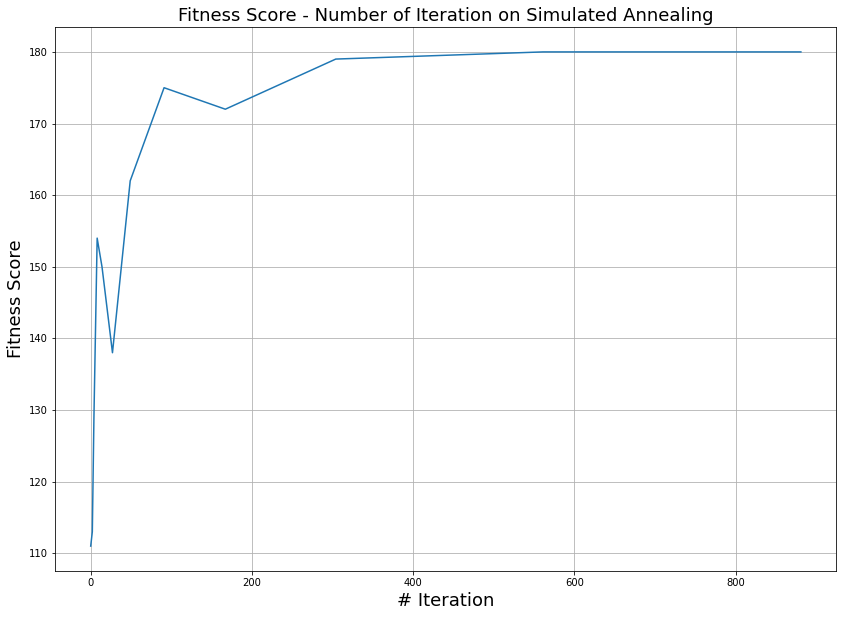

In [ ]:
iter_score (best_params_run_sa['FEvals'], best_params_run_sa['Fitness'], 'Simulated Annealing')

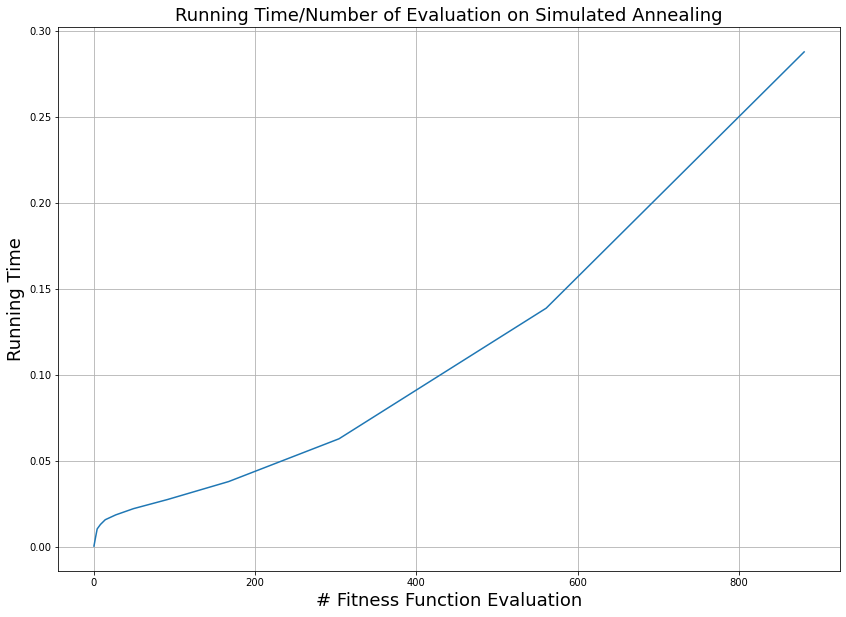

In [ ]:
eval_time(best_params_run_sa['FEvals'], best_params_run_sa['Time'], 'Simulated Annealing')

In [ ]:
sa_exp = df_sa_stats['schedule_type'].unique()[1]
sa_exp

'exponential'

In [ ]:
df_sa_stats_exp = df_sa_stats[(df_sa_stats['schedule_type'] == sa_geo) & (df_sa_stats['schedule_init_temp'] == 8)]
df_sa_stats_exp


,Iteration,Fitness,FEvals,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters,generate_curve,schedule_exp_const
60,0,111.0,0,0.000187,"[2, 4, 7, 6, 8, 8, 1, 6]",exponential,8,NaN,0.001,7.999993,8,1024,True,0.005
61,1,113.0,2,0.012093,"[2, 4, 7, 6, 8, 8, 1, 8]",exponential,8,NaN,0.001,7.999516,8,1024,True,0.005
62,2,129.0,4,0.023793,"[2, 4, 7, 6, 8, 8, 9, 8]",exponential,8,NaN,0.001,7.999048,8,1024,True,0.005
63,4,154.0,8,0.035498,"[2, 9, 7, 6, 8, 8, 9, 8]",exponential,8,NaN,0.001,7.998580,8,1024,True,0.005
64,8,125.0,15,0.046918,"[1, 4, 7, 5, 8, 8, 9, 8]",exponential,8,NaN,0.001,7.998123,8,1024,True,0.005
65,16,113.0,28,0.058276,"[2, 4, 0, 2, 7, 8, 9, 8]",exponential,8,NaN,0.001,7.997669,8,1024,True,0.005
66,32,161.0,50,0.071135,"[6, 9, 0, 3, 9, 8, 9, 8]",exponential,8,NaN,0.001,7.997155,8,1024,True,0.005
67,64,155.0,95,0.086508,"[8, 8, 0, 3, 9, 7, 8, 6]",exponential,8,NaN,0.001,7.996540,8,1024,True,0.005
68,128,154.0,182,0.106281,"[9, 7, 0, 1, 9, 8, 9, 4]",exponential,8,NaN,0.001,7.995750,8,1024,True,0.005
69,256,158.0,339,0.139901,"[9, 7, 3, 5, 9, 7, 7, 8]",exponential,8,NaN,0.001,7.994406,8,1024,True,0.005


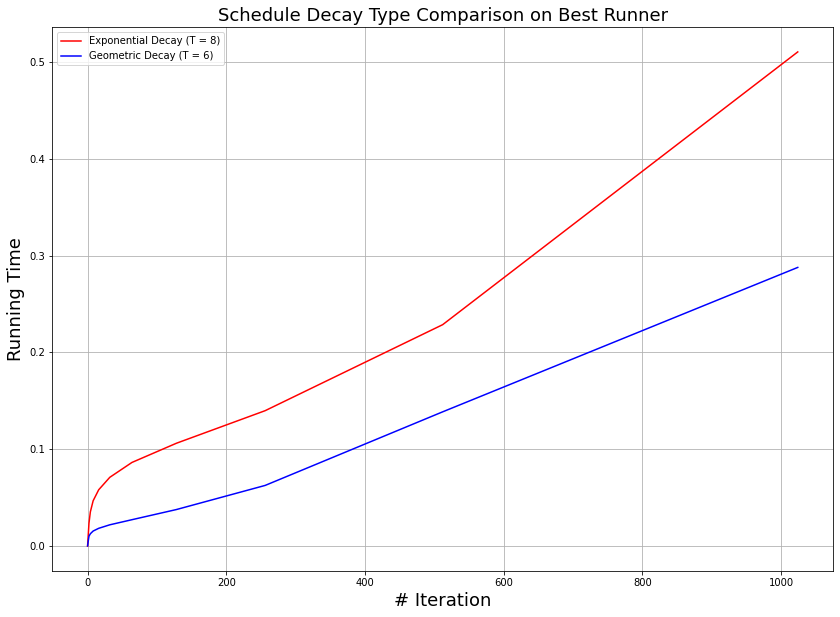

In [ ]:
iter_compare(df_sa_stats_exp['Iteration'], df_sa_stats_exp['Time'], best_params_run_sa['Time'], 'Exponential Decay (T = 8)', 'Geometric Decay (T = 6)', '# Iteration', 'Running Time', 'Schedule Decay Type')

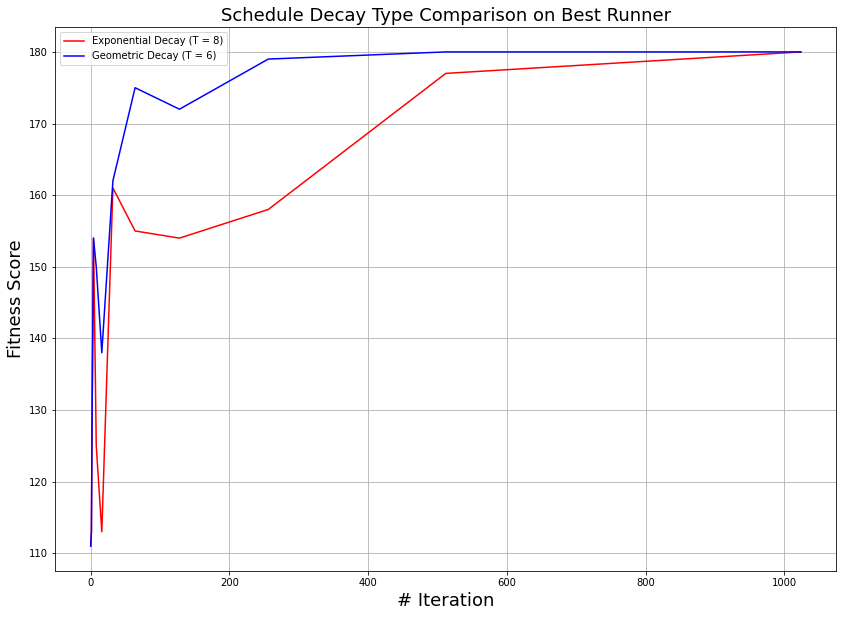

In [ ]:
iter_compare(df_sa_stats_exp['Iteration'], df_sa_stats_exp['Fitness'], best_params_run_sa['Fitness'], 'Exponential Decay (T = 8)', 'Geometric Decay (T = 6)', '# Iteration', 'Fitness Score', 'Schedule Decay Type')

In [ ]:
high_t = df_sa_stats['schedule_type'].unique()[0]
high_t

'geometric'

In [ ]:
df_sa_stats_high_t = df_sa_stats[(df_sa_stats['schedule_type'] == high_t) & (df_sa_stats['schedule_init_temp'] == 10)]

df_sa_stats_high_t

,Iteration,Fitness,FEvals,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters,generate_curve,schedule_exp_const
96,0,111.0,0,0.000177,"[2, 4, 7, 6, 8, 8, 1, 6]",geometric,10,0.99,0.001,9.999982,10,1024,True,NaN
97,1,113.0,2,0.016935,"[2, 4, 7, 6, 8, 8, 1, 8]",geometric,10,0.99,0.001,9.998298,10,1024,True,NaN
98,2,129.0,4,0.033493,"[2, 4, 7, 6, 8, 8, 9, 8]",geometric,10,0.99,0.001,9.996634,10,1024,True,NaN
99,4,154.0,8,0.052363,"[2, 9, 7, 6, 8, 8, 9, 8]",geometric,10,0.99,0.001,9.994739,10,1024,True,NaN
100,8,125.0,15,0.071931,"[1, 4, 7, 5, 8, 8, 9, 8]",geometric,10,0.99,0.001,9.992773,10,1024,True,NaN
101,16,113.0,28,0.095600,"[2, 4, 0, 2, 7, 8, 9, 8]",geometric,10,0.99,0.001,9.990397,10,1024,True,NaN
102,32,148.0,52,0.124335,"[6, 9, 0, 3, 9, 8, 4, 5]",geometric,10,0.99,0.001,9.987512,10,1024,True,NaN
103,64,153.0,99,0.145137,"[8, 9, 3, 6, 9, 7, 1, 7]",geometric,10,0.99,0.001,9.985424,10,1024,True,NaN
104,128,169.0,187,0.169750,"[9, 9, 5, 1, 9, 8, 9, 4]",geometric,10,0.99,0.001,9.982954,10,1024,True,NaN
105,256,171.0,331,0.214446,"[9, 8, 9, 1, 9, 8, 9, 7]",geometric,10,0.99,0.001,9.978471,10,1024,True,NaN


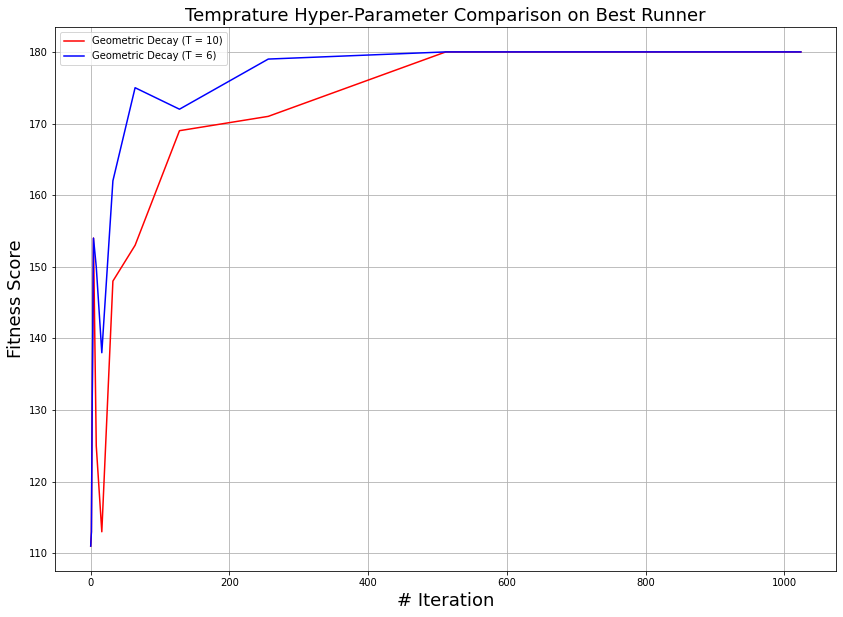

In [ ]:
iter_compare(df_sa_stats_exp['Iteration'], df_sa_stats_high_t['Fitness'], best_params_run_sa['Fitness'], 'Geometric Decay (T = 10)', 'Geometric Decay (T = 6)', '# Iteration', 'Fitness Score', 'Temprature Hyper-Parameter')

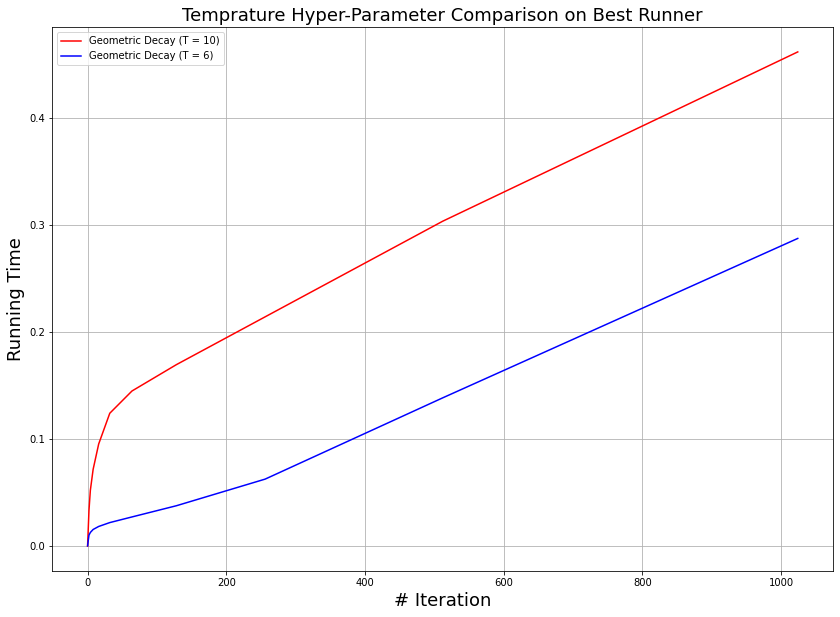

In [ ]:
iter_compare(df_sa_stats_exp['Iteration'], df_sa_stats_high_t['Time'], best_params_run_sa['Time'], 'Geometric Decay (T = 10)', 'Geometric Decay (T = 6)', '# Iteration', 'Running Time', 'Temprature Hyper-Parameter')

GA


In [ ]:
ga = GARunner(problem, experiment_name='knapsack_ga', seed=0,
              iteration_list = 2 ** np.arange(11),
              population_sizes= [10, 20, 50],
              mutation_rates= [0.1, 0.3, 0.5])

In [ ]:
# the two data frames will contain the results
df_ga_stats, df_ga_curves = ga.run()

In [ ]:
best_fitness_ga = df_ga_curves['Fitness'].max()
best_runs_ga = df_ga_curves[df_ga_curves['Fitness'] == best_fitness_ga]

best_runs_ga

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
1964,68,0.085261,180.0,1458.0,20,0.1,1024
1965,69,0.086112,180.0,1479.0,20,0.1,1024
1966,70,0.087427,180.0,1500.0,20,0.1,1024
1967,71,0.088579,180.0,1521.0,20,0.1,1024
1968,72,0.089497,180.0,1542.0,20,0.1,1024
...,...,...,...,...,...,...,...
6021,514,0.714031,180.0,26270.0,50,0.5,1024
6022,515,0.715109,180.0,26321.0,50,0.5,1024
6023,516,0.716206,180.0,26372.0,50,0.5,1024
6024,517,0.719002,180.0,26423.0,50,0.5,1024


In [ ]:
best_iter_ga = best_runs_ga['Iteration'].min()

optim_ga = best_runs_ga[best_runs_ga['Iteration'] == best_iter_ga]

optim_ga

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
5525,18,0.037694,180.0,974.0,50,0.5,1024


In [ ]:
# Best Param

mut_rate = 0.5
pop_size = 50

best_params_run_ga = df_ga_stats[(df_ga_stats['Population Size'] == pop_size) &
                                 (df_ga_stats['Mutation Rate'] == mut_rate)]

best_params_run_ga                                 

,Iteration,Fitness,FEvals,Time,State,Population Size,Mutation Rate,max_iters
96,0,111.0,50,0.001610,"[2, 4, 7, 6, 8, 8, 1, 6]",50,0.5,1024
97,1,165.0,102,0.021132,"[7, 7, 8, 2, 9, 9, 9, 9]",50,0.5,1024
98,2,165.0,153,0.040471,"[7, 7, 8, 2, 9, 9, 9, 9]",50,0.5,1024
99,4,165.0,255,0.067938,"[7, 7, 8, 2, 9, 9, 9, 9]",50,0.5,1024
100,8,175.0,461,0.099097,"[7, 9, 8, 2, 9, 9, 9, 9]",50,0.5,1024
101,16,179.0,871,0.151902,"[9, 9, 9, 1, 9, 9, 8, 9]",50,0.5,1024
102,32,180.0,1688,0.233896,"[9, 9, 8, 1, 9, 9, 9, 9]",50,0.5,1024
103,64,180.0,3320,0.388806,"[9, 9, 8, 1, 9, 9, 9, 9]",50,0.5,1024
104,128,180.0,6584,0.672875,"[9, 9, 8, 1, 9, 9, 9, 9]",50,0.5,1024
105,256,180.0,13112,1.225716,"[9, 9, 8, 1, 9, 9, 9, 9]",50,0.5,1024


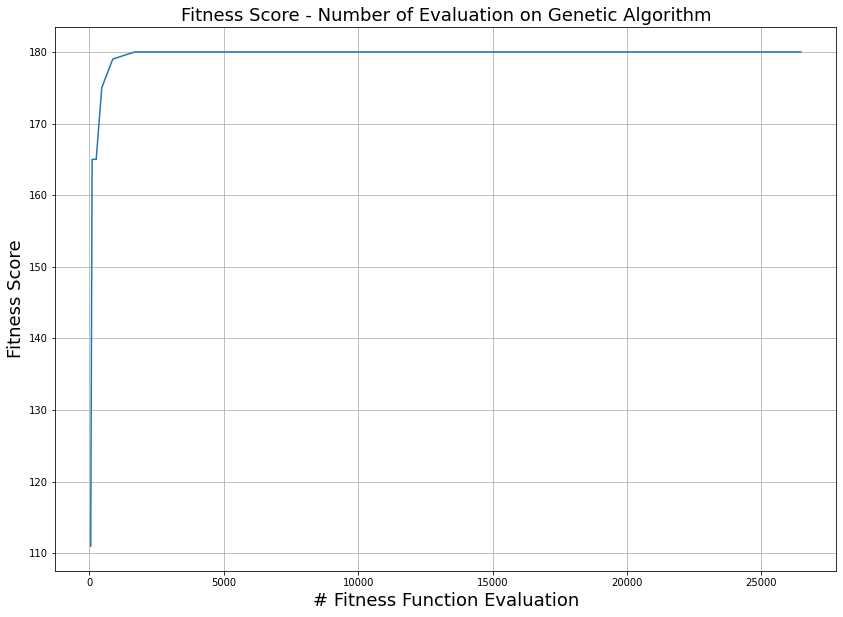

In [ ]:
eval_score(best_params_run_ga['FEvals'], best_params_run_ga['Fitness'], 'Genetic Algorithm')

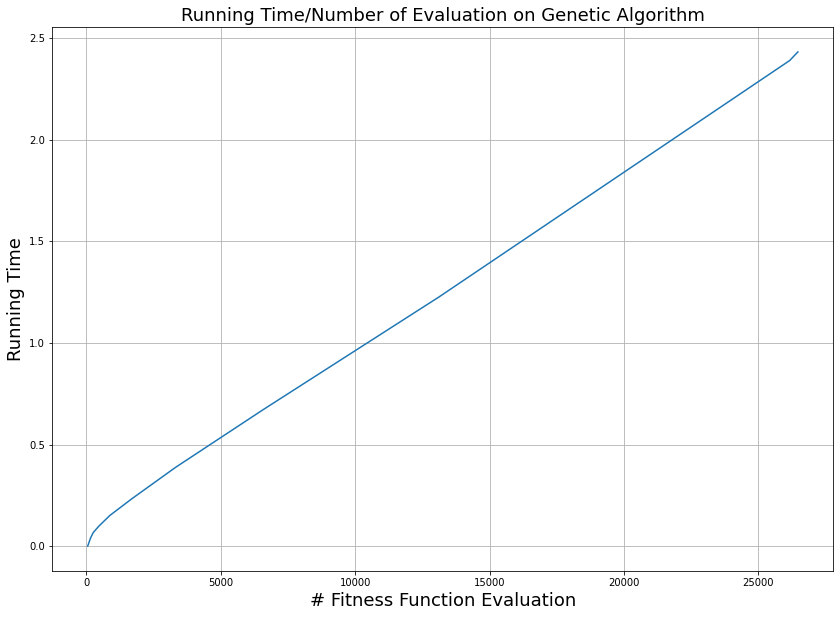

In [ ]:
eval_time(best_params_run_ga['FEvals'], best_params_run_ga['Time'], 'Genetic Algorithm')

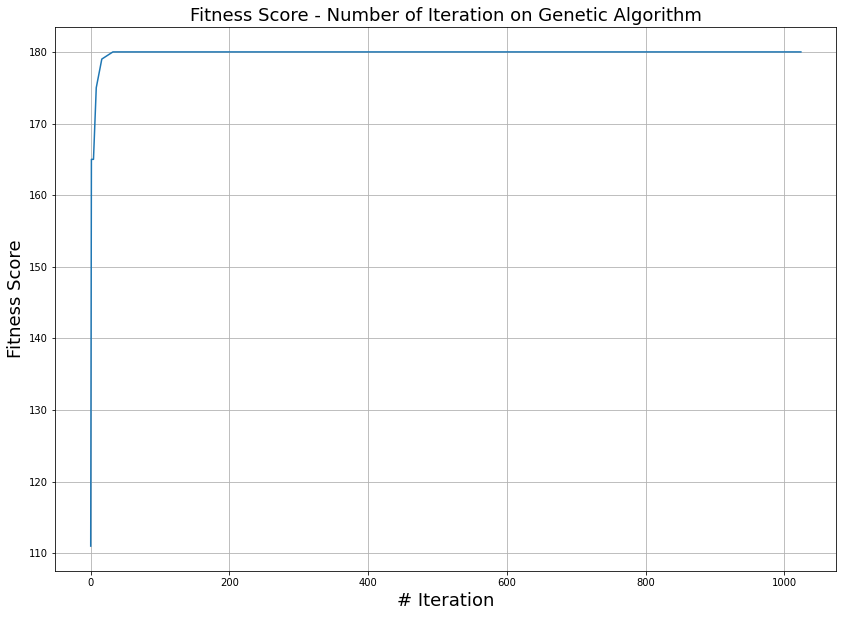

In [ ]:
iter_score(best_params_run_ga['Iteration'], best_params_run_ga['Fitness'], 'Genetic Algorithm')

In [ ]:
df_ga_stats_low_mut = df_ga_stats[(df_ga_stats['Population Size'] == pop_size) &
                                 (df_ga_stats['Mutation Rate'] == 0.1)]

df_ga_stats_low_mut                                 

,Iteration,Fitness,FEvals,Time,State,Population Size,Mutation Rate,max_iters
72,0,111.0,50,0.002939,"[2, 4, 7, 6, 8, 8, 1, 6]",50,0.1,1024
73,1,153.0,102,0.033295,"[4, 8, 4, 3, 9, 8, 9, 7]",50,0.1,1024
74,2,153.0,153,0.061493,"[4, 8, 4, 3, 9, 8, 9, 7]",50,0.1,1024
75,4,173.0,257,0.102072,"[9, 9, 4, 3, 9, 8, 9, 7]",50,0.1,1024
76,8,173.0,461,0.158522,"[9, 9, 4, 3, 9, 8, 9, 7]",50,0.1,1024
77,16,175.0,871,0.238030,"[9, 9, 4, 3, 9, 8, 9, 9]",50,0.1,1024
78,32,175.0,1687,0.378476,"[9, 9, 4, 3, 9, 8, 9, 9]",50,0.1,1024
79,64,180.0,3322,0.637262,"[9, 9, 8, 1, 9, 9, 9, 9]",50,0.1,1024
80,128,180.0,6586,1.098542,"[9, 9, 8, 1, 9, 9, 9, 9]",50,0.1,1024
81,256,180.0,13114,1.621854,"[9, 9, 8, 1, 9, 9, 9, 9]",50,0.1,1024


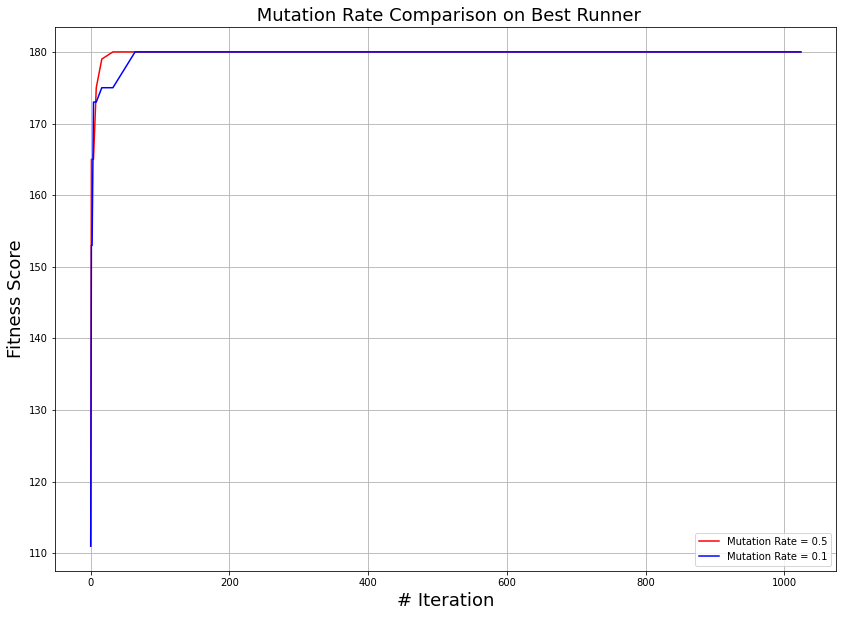

In [ ]:
iter_compare(best_params_run_ga['Iteration'], best_params_run_ga['Fitness'], df_ga_stats_low_mut['Fitness'], 'Mutation Rate = 0.5', 'Mutation Rate = 0.1', '# Iteration', 'Fitness Score', ' Mutation Rate')

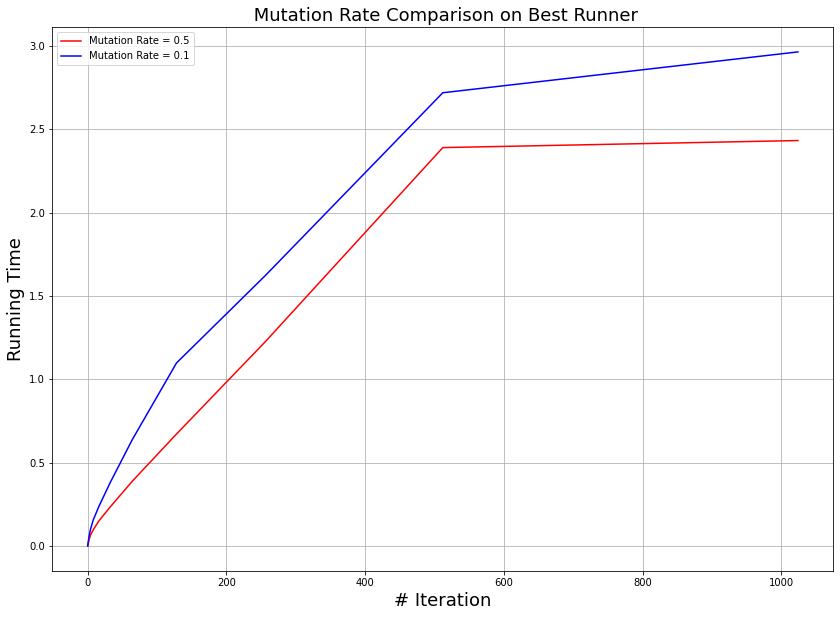

In [ ]:
iter_compare(best_params_run_ga['Iteration'], best_params_run_ga['Time'], df_ga_stats_low_mut['Time'], 'Mutation Rate = 0.5', 'Mutation Rate = 0.1', '# Iteration', 'Running Time', ' Mutation Rate')

In [ ]:
df_ga_stats_low_pop = df_ga_stats[(df_ga_stats['Population Size'] == 10) &
                                 (df_ga_stats['Mutation Rate'] == mut_rate)]

df_ga_stats_low_pop

,Iteration,Fitness,FEvals,Time,State,Population Size,Mutation Rate,max_iters
24,0,111.0,10,0.000515,"[2, 4, 7, 6, 8, 8, 1, 6]",10,0.5,1024
25,1,142.0,22,0.007016,"[7, 7, 8, 1, 5, 9, 8, 9]",10,0.5,1024
26,2,142.0,33,0.013257,"[7, 7, 8, 1, 5, 9, 8, 9]",10,0.5,1024
27,4,152.0,56,0.020753,"[9, 9, 8, 1, 7, 9, 0, 9]",10,0.5,1024
28,8,159.0,104,0.029592,"[7, 9, 0, 1, 8, 9, 8, 9]",10,0.5,1024
29,16,170.0,193,0.041500,"[9, 9, 5, 1, 8, 9, 8, 9]",10,0.5,1024
30,32,176.0,371,0.060202,"[9, 9, 5, 2, 9, 9, 8, 9]",10,0.5,1024
31,64,178.0,724,0.098586,"[9, 9, 5, 2, 9, 9, 9, 9]",10,0.5,1024
32,128,178.0,1428,0.162726,"[9, 9, 5, 2, 9, 9, 9, 9]",10,0.5,1024
33,256,179.0,2837,0.294426,"[9, 9, 8, 2, 9, 9, 8, 9]",10,0.5,1024


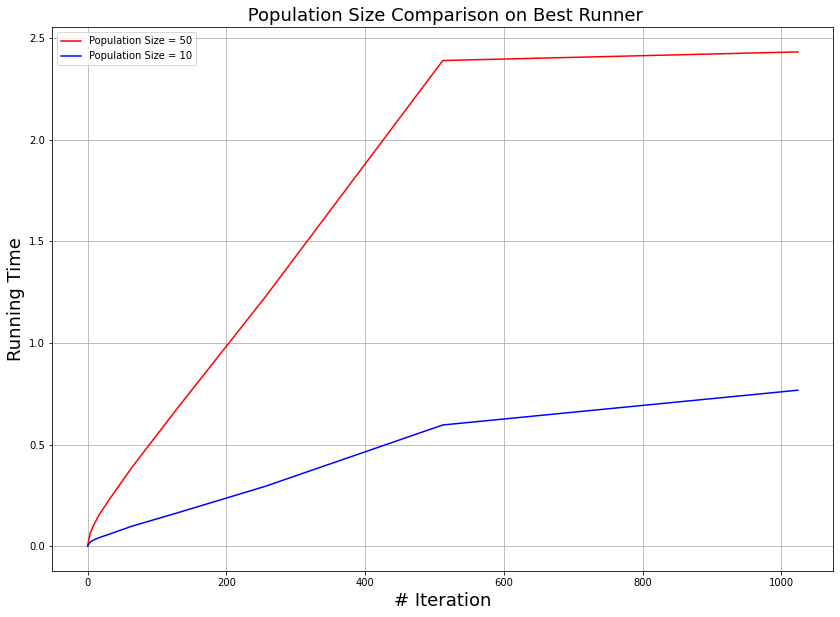

In [ ]:
iter_compare(best_params_run_ga['Iteration'], best_params_run_ga['Time'], df_ga_stats_low_pop['Time'], 'Population Size = 50', 'Population Size = 10', '# Iteration', 'Running Time', ' Population Size')

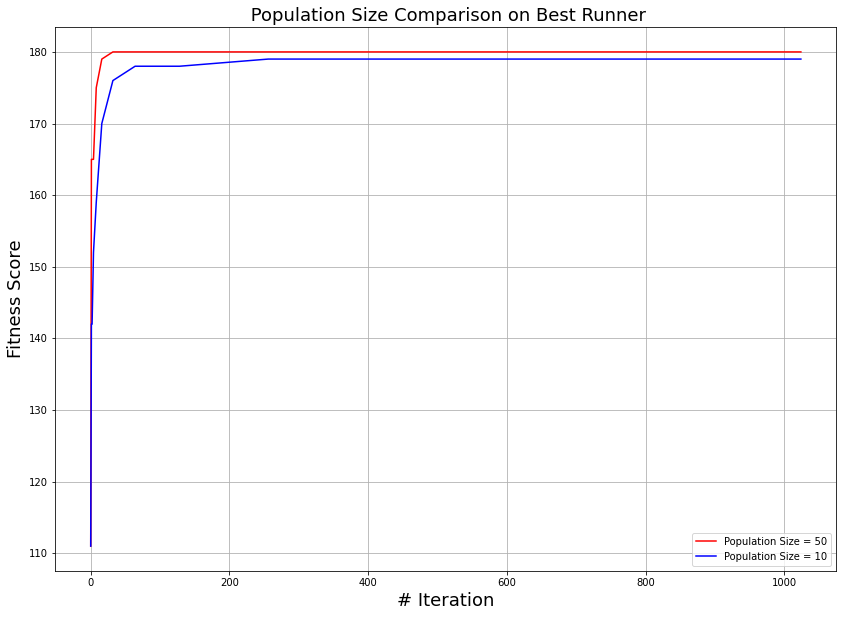

In [ ]:
iter_compare(best_params_run_ga['Iteration'], best_params_run_ga['Fitness'], df_ga_stats_low_pop['Fitness'], 'Population Size = 50', 'Population Size = 10', '# Iteration', 'Fitness Score', ' Population Size')

MIMC


In [ ]:
mc = MIMICRunner(problem, experiment_name = 'knapsack_mimic', 
                 seed = 0, iteration_list= 2 ** np.arange(11),
                 population_sizes= [60, 70, 80, 100],
                 keep_percent_list= [0.1, 0.3, 0.5],
                 generate_curves= True, use_fast_mimic=True)

In [ ]:
df_mimic_stats, df_mimic_curves = mc.run()

In [ ]:
best_fitness_mc  = df_mimic_curves['Fitness'].max()
best_runs_mc = df_mimic_curves[df_mimic_curves['Fitness'] == best_fitness_mc]

best_runs_mc

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
1540,8,0.124586,174.0,640.0,True,70,0.1,1024
1541,9,0.141006,174.0,711.0,True,70,0.1,1024
1542,10,0.152628,174.0,782.0,True,70,0.1,1024
1543,11,0.163751,174.0,853.0,True,70,0.1,1024
1544,12,0.175589,174.0,924.0,True,70,0.1,1024
...,...,...,...,...,...,...,...,...
2036,504,0.037894,174.0,35856.0,True,70,0.1,1024
2037,505,0.052669,174.0,35927.0,True,70,0.1,1024
2038,506,0.063630,174.0,35998.0,True,70,0.1,1024
2039,507,0.080287,174.0,36069.0,True,70,0.1,1024


In [ ]:
min_iteration_mc = best_runs_mc['Iteration'].min()

optim_mc = best_runs_mc[best_runs_mc['Iteration'] == min_iteration_mc]

optim_mc

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
1540,8,0.124586,174.0,640.0,True,70,0.1,1024


In [ ]:
# Best Params

pop_size_mc = 70
keep_perc = 0.1

best_param_run_mc = df_mimic_stats[(df_mimic_stats['Population Size'] == pop_size_mc) & (df_mimic_stats['Keep Percent'] == keep_perc)]

best_param_run_mc

,Iteration,Fitness,FEvals,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
36,0,111.0,70,0.002249,"[2, 4, 7, 6, 8, 8, 1, 6]",True,70,0.1,1024
37,1,162.0,142,0.019897,"[7.0, 7.0, 8.0, 1.0, 9.0, 9.0, 8.0, 9.0]",True,70,0.1,1024
38,2,162.0,213,0.038095,"[7.0, 7.0, 8.0, 1.0, 9.0, 9.0, 8.0, 9.0]",True,70,0.1,1024
39,4,162.0,355,0.068035,"[7.0, 7.0, 8.0, 1.0, 9.0, 9.0, 8.0, 9.0]",True,70,0.1,1024
40,8,174.0,640,0.120756,"[7.0, 9.0, 8.0, 1.0, 9.0, 9.0, 9.0, 9.0]",True,70,0.1,1024
41,16,174.0,1208,0.216413,"[7.0, 9.0, 8.0, 1.0, 9.0, 9.0, 9.0, 9.0]",True,70,0.1,1024
42,32,174.0,2344,0.408886,"[7.0, 9.0, 8.0, 1.0, 9.0, 9.0, 9.0, 9.0]",True,70,0.1,1024
43,64,174.0,4616,0.817558,"[7.0, 9.0, 8.0, 1.0, 9.0, 9.0, 9.0, 9.0]",True,70,0.1,1024
44,128,174.0,9160,1.589598,"[7.0, 9.0, 8.0, 1.0, 9.0, 9.0, 9.0, 9.0]",True,70,0.1,1024
45,256,174.0,18248,3.128678,"[7.0, 9.0, 8.0, 1.0, 9.0, 9.0, 9.0, 9.0]",True,70,0.1,1024


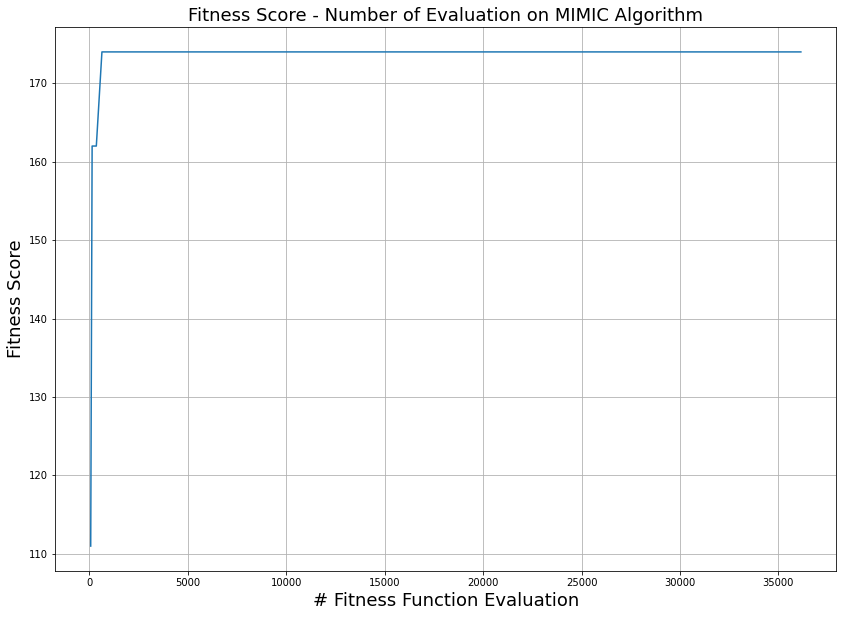

In [ ]:
eval_score(best_param_run_mc['FEvals'], best_param_run_mc['Fitness'], 'MIMIC Algorithm')

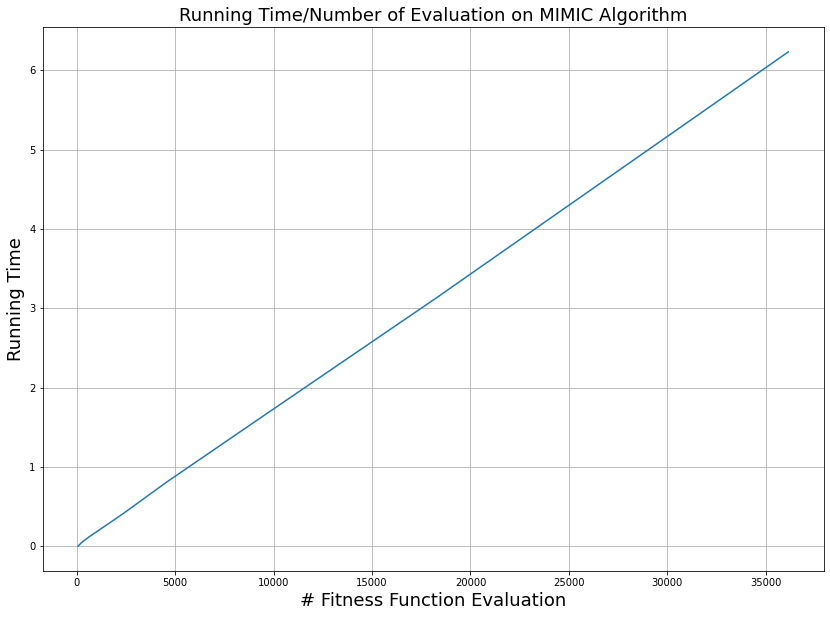

In [ ]:
eval_time(best_param_run_mc['FEvals'], best_param_run_mc['Time'], 'MIMIC Algorithm')

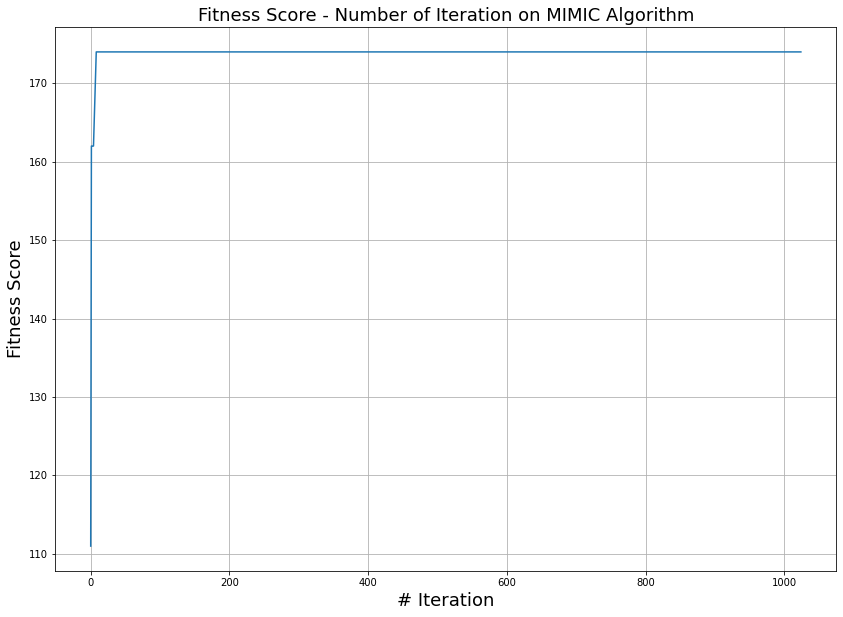

In [ ]:
iter_score(best_param_run_mc['Iteration'], best_param_run_mc['Fitness'], 'MIMIC Algorithm')

In [ ]:
df_mc_stats_high_prc = df_mimic_stats[(df_mimic_stats['Population Size'] == pop_size_mc) & (df_mimic_stats['Keep Percent'] == 0.5)]

df_mc_stats_high_prc

,Iteration,Fitness,FEvals,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
60,0,111.0,70,0.002173,"[2, 4, 7, 6, 8, 8, 1, 6]",True,70,0.5,1024
61,1,154.0,142,0.025401,"[9.0, 8.0, 2.0, 6.0, 7.0, 9.0, 7.0, 3.0]",True,70,0.5,1024
62,2,157.0,214,0.047765,"[9.0, 8.0, 4.0, 6.0, 7.0, 9.0, 7.0, 4.0]",True,70,0.5,1024
63,4,157.0,356,0.083156,"[9.0, 8.0, 4.0, 6.0, 7.0, 9.0, 7.0, 4.0]",True,70,0.5,1024
64,8,167.0,644,0.142623,"[9.0, 9.0, 4.0, 6.0, 8.0, 9.0, 7.0, 4.0]",True,70,0.5,1024
65,16,167.0,1212,0.258601,"[9.0, 9.0, 4.0, 6.0, 8.0, 9.0, 7.0, 4.0]",True,70,0.5,1024
66,32,167.0,2348,0.464294,"[9.0, 9.0, 4.0, 6.0, 8.0, 9.0, 7.0, 4.0]",True,70,0.5,1024
67,64,167.0,4620,0.854005,"[9.0, 9.0, 4.0, 6.0, 8.0, 9.0, 7.0, 4.0]",True,70,0.5,1024
68,128,167.0,9164,1.610685,"[9.0, 9.0, 4.0, 6.0, 8.0, 9.0, 7.0, 4.0]",True,70,0.5,1024
69,256,167.0,18252,3.136229,"[9.0, 9.0, 4.0, 6.0, 8.0, 9.0, 7.0, 4.0]",True,70,0.5,1024


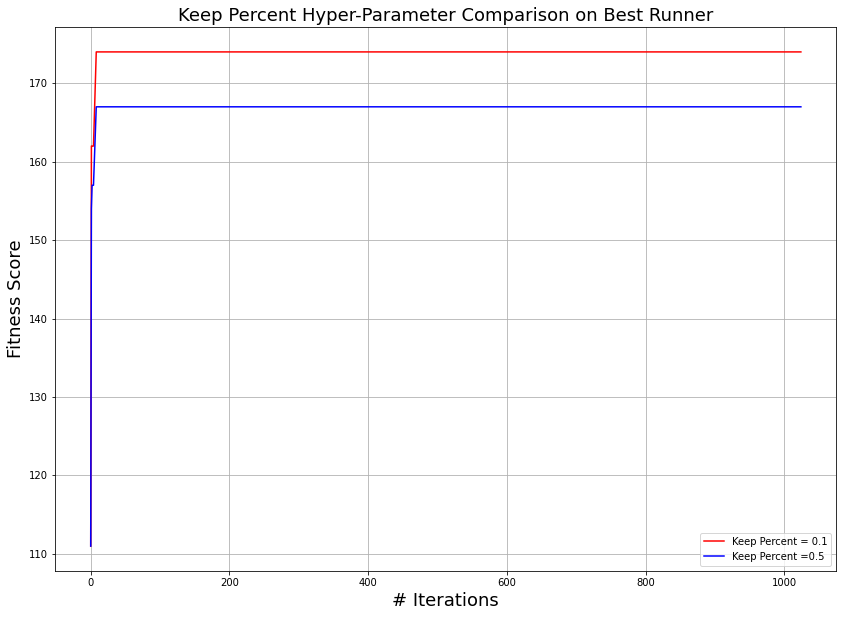

In [ ]:
iter_compare(best_param_run_mc['Iteration'], best_param_run_mc['Fitness'], df_mc_stats_high_prc['Fitness'], 'Keep Percent = 0.1', 'Keep Percent =0.5', '# Iterations', 'Fitness Score', 'Keep Percent Hyper-Parameter')

In [ ]:
df_mc_stats_high_pop = df_mimic_stats[(df_mimic_stats['Population Size'] == 100) & (df_mimic_stats['Keep Percent'] == mut_rate)]

df_mc_stats_high_pop

,Iteration,Fitness,FEvals,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
132,0,111.0,100,0.003030,"[2, 4, 7, 6, 8, 8, 1, 6]",True,100,0.5,1024
133,1,157.0,202,0.033538,"[7.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 0.0]",True,100,0.5,1024
134,2,160.0,304,0.063875,"[8.0, 9.0, 3.0, 6.0, 8.0, 5.0, 9.0, 9.0]",True,100,0.5,1024
135,4,166.0,507,0.117749,"[9.0, 9.0, 3.0, 6.0, 9.0, 7.0, 5.0, 9.0]",True,100,0.5,1024
136,8,166.0,911,0.185507,"[9.0, 9.0, 3.0, 6.0, 9.0, 7.0, 5.0, 9.0]",True,100,0.5,1024
137,16,169.0,1720,0.304491,"[9.0, 9.0, 3.0, 6.0, 9.0, 8.0, 5.0, 9.0]",True,100,0.5,1024
138,32,169.0,3336,0.524190,"[9.0, 9.0, 3.0, 6.0, 9.0, 8.0, 5.0, 9.0]",True,100,0.5,1024
139,64,169.0,6568,0.952371,"[9.0, 9.0, 3.0, 6.0, 9.0, 8.0, 5.0, 9.0]",True,100,0.5,1024
140,128,169.0,13032,1.808571,"[9.0, 9.0, 3.0, 6.0, 9.0, 8.0, 5.0, 9.0]",True,100,0.5,1024
141,256,169.0,25960,3.486580,"[9.0, 9.0, 3.0, 6.0, 9.0, 8.0, 5.0, 9.0]",True,100,0.5,1024


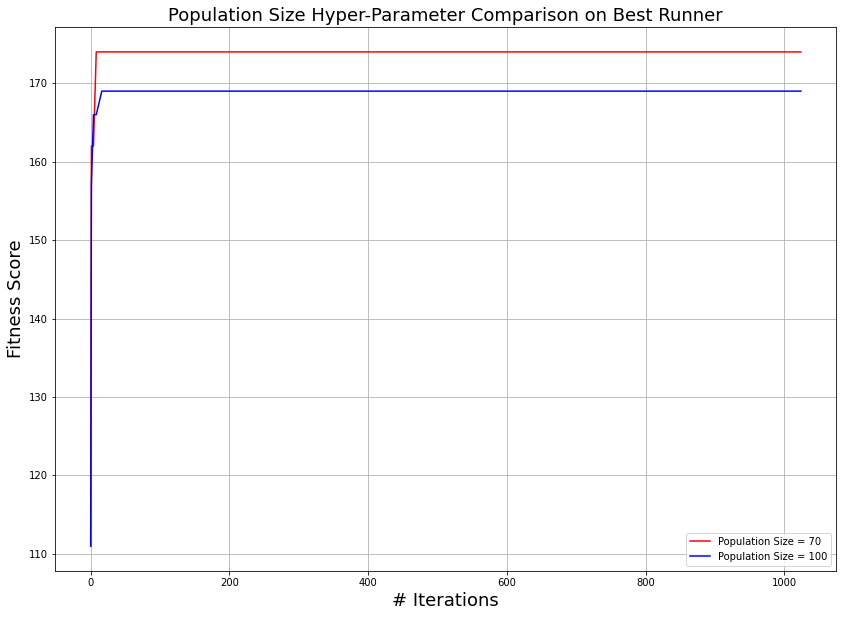

In [ ]:
iter_compare(best_param_run_mc['Iteration'], best_param_run_mc['Fitness'], df_mc_stats_high_pop['Fitness'], 'Population Size = 70', 'Population Size = 100', '# Iterations', 'Fitness Score', 'Population Size Hyper-Parameter')

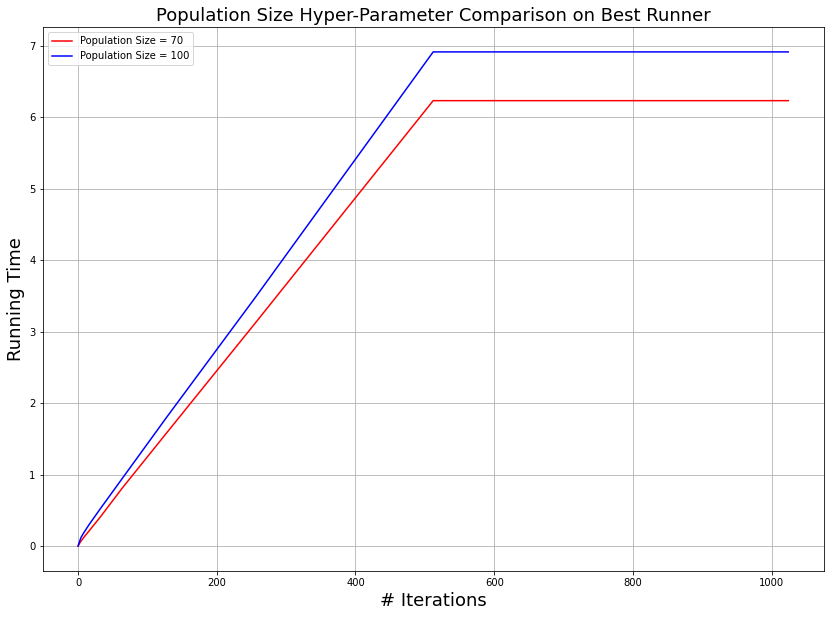

In [ ]:
iter_compare(best_param_run_mc['Iteration'], best_param_run_mc['Time'], df_mc_stats_high_pop['Time'], 'Population Size = 70', 'Population Size = 100', '# Iterations', 'Running Time', 'Population Size Hyper-Parameter')

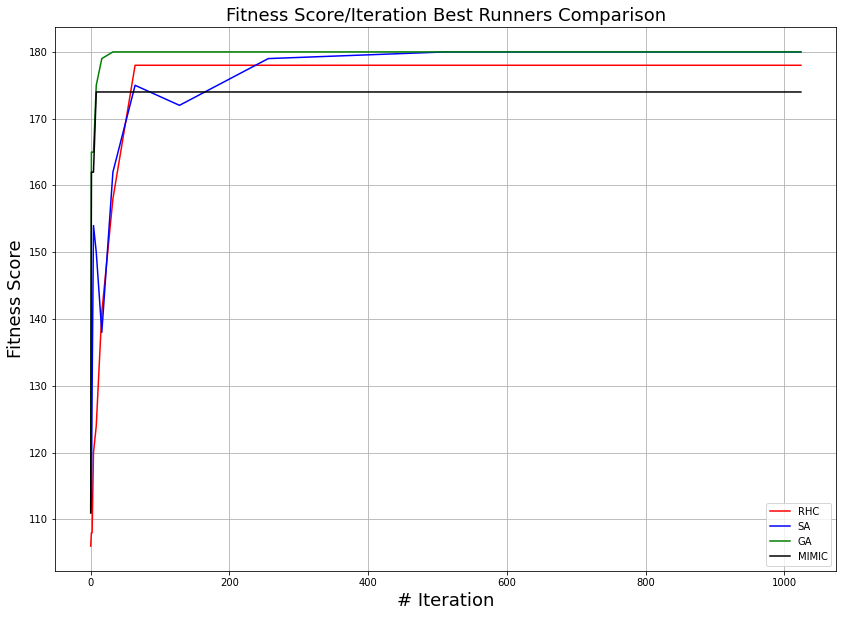

In [ ]:
iter_final_compare(best_params_run_rhc['Iteration'], best_params_run_rhc['Fitness'], best_params_run_sa['Fitness'], best_params_run_ga['Fitness'],
                   best_param_run_mc['Fitness'], 'RHC', 'SA', 'GA', 'MIMIC', '# Iteration', 'Fitness Score', 'Fitness Score/Iteration')

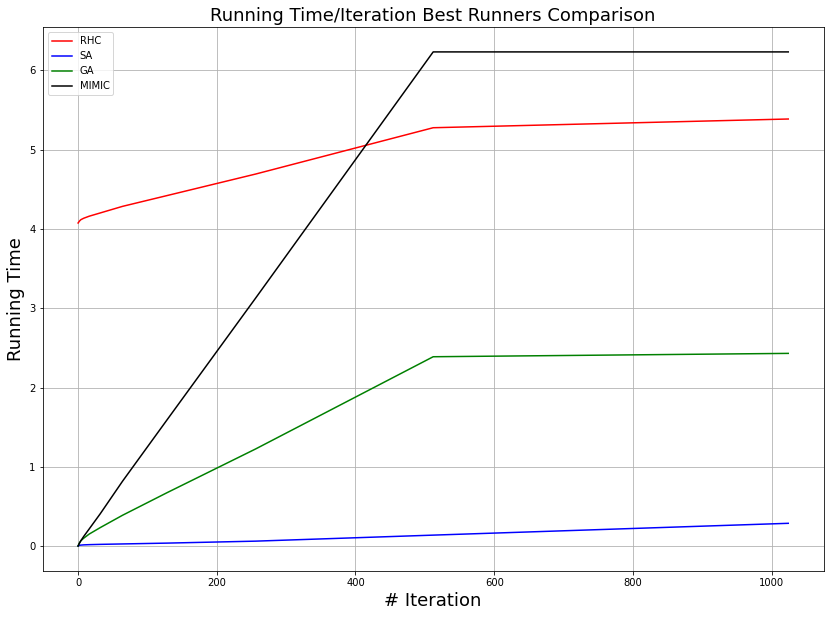

In [ ]:
iter_final_compare(best_params_run_rhc['Iteration'], best_params_run_rhc['Time'], best_params_run_sa['Time'], best_params_run_ga['Time'],
                   best_param_run_mc['Time'], 'RHC', 'SA', 'GA', 'MIMIC', '# Iteration', 'Running Time', 'Running Time/Iteration')